In [1]:
from scipy.stats import norm, normaltest, zscore
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
import numpy as np
import math
import pandas as pd

# 1. Normal Distributions in python

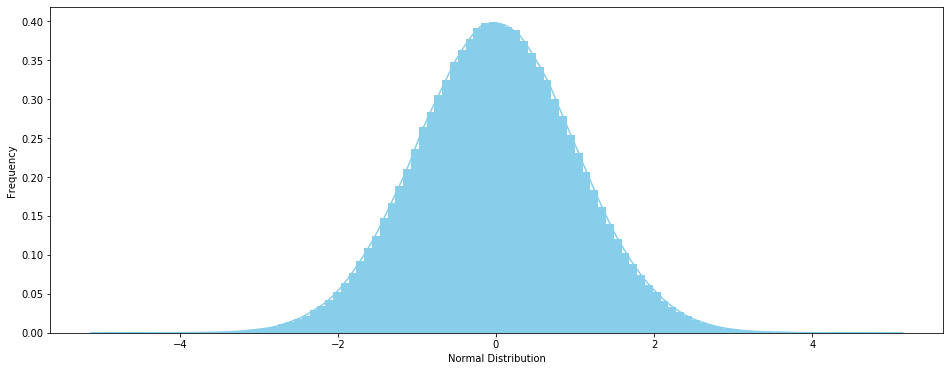

In [2]:
# generate a normal dist a.k.a. Gaussian, Bell
data_normal = norm.rvs(size=1000000,loc=0,scale=1)

plt.figure(figsize=(16, 6))
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Normal Distribution', ylabel='Frequency')

When we have a data sample that looks to be resembling a normal curve, we can make the assumption that our sample is drawn from a larger population which is normally distributed. 

This allows us to analyse our sample in the same we would a normal distribution. 

One of the most important properties of a normal curve is that we can state the proportion of the population that will lie between any two values of the variable.

> The standard deviation slices a bell curve into known proportions. One standard deviation from the mean will always take you to the 'point of inflection'. About 68% of all data will fall within this point. (34%) is each direction. 95% will fall within 2 standard devs.

We can check these percentages are correct by using the above distribution.

In [3]:
print(f'std = {data_normal.std()}')
print(f'mean = {data_normal.mean()}')

std = 1.0001097104222811
mean = -0.0013395282431465825


We can verify these preportions using the *Cumulative Distribution Function*. Why is the below 0.5?

In [4]:
# Cumulative Distribution Function (cdf)
# returns the probability of a value less than or equal to a given outcome
norm.cdf(0)

0.5

<img src="media/normal.png" alt="Uniform" style="width: 400px;"/>

### **Q: Calculate the probability of drawing a value higher than 2 standard deviations from the mean using the cdf**

In [5]:
1 - norm.cdf(2*1)

0.02275013194817921

### Stretch Q: Show the probability of measuring a value within one standard deviation of the mean using the cdf 

In [7]:
norm.cdf(data_normal.std()) - (1 - norm.cdf(data_normal.std()))

0.6827425826453684

Further information on these here: https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/#:~:text=The%20probability%20of%20an%20event,or%20equal%20to%20a%20probability.

Key points:
> Normal Distributions are very frequently seen in the real world

> They can be characterised by two values: mean & standard deviation.

> Standard deviation divides the Normal curve into known portions.


# 2. From Samples to Population

Often we talk of a distinction between *descriptive* and *inferential* statistics. The former deals with methods used to summarise and describe our observations. The latter attempts to draw predictions on future phenomena, based on patterns observed in the past.

This distinction depends crucially on another: the difference between *samples* and *populations*. 

* Population - *all* cases of the target attribute that exist
* Sample - a small selection of the wider population available for analysis

Let's create a fake sample of data. This could be anything that we have gone out to the world and measured from a normally distributed population. We will create a theoretical population, and then create our own small sample. 

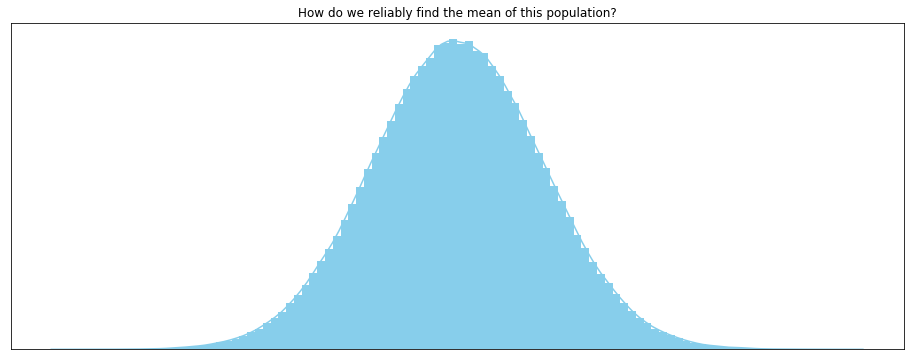

In [8]:
# Population of an unknown mean and variance
random.seed(54321)
pop_mean = np.random.uniform(0,1000)
pop_std = np.random.uniform(0,500)
pop = norm.rvs(size=1000000,
               loc=pop_mean,
               scale=pop_std)
plt.figure(figsize=(16, 6))
ax = sns.distplot(pop,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Value', ylabel='Frequency')
title = ax.set(title='How do we reliably find the mean of this population?')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

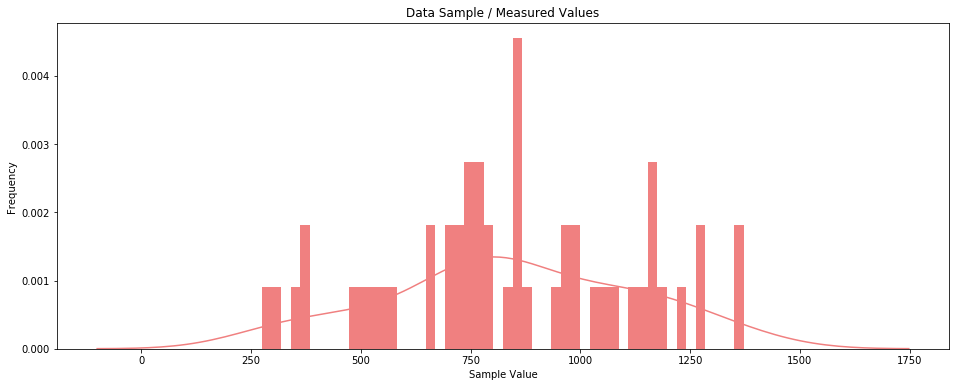

In [9]:
# sample size 
n = 50

# take a random sample 
sample = random.choice(pop,n)

plt.figure(figsize=(16, 6))
ax = sns.distplot(sample,
                  bins=50,
                  kde=True,
                  color='lightcoral',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Sample Value', ylabel='Frequency')
title = ax.set(title='Data Sample / Measured Values')

In [11]:
sample_mean = sample.mean()
sample_std = sample.std()
print(sample_mean)
print(sample_std)

842.7147371862295
278.6516133055585


Let's sense check the above. We can convert our data into z-units, or z-scores, allowing easier comparison to the Normal distribution.

> The **Z-score** is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

## Q: Create calculate the z-scores for our sample

In [12]:
z = zscore(sample)



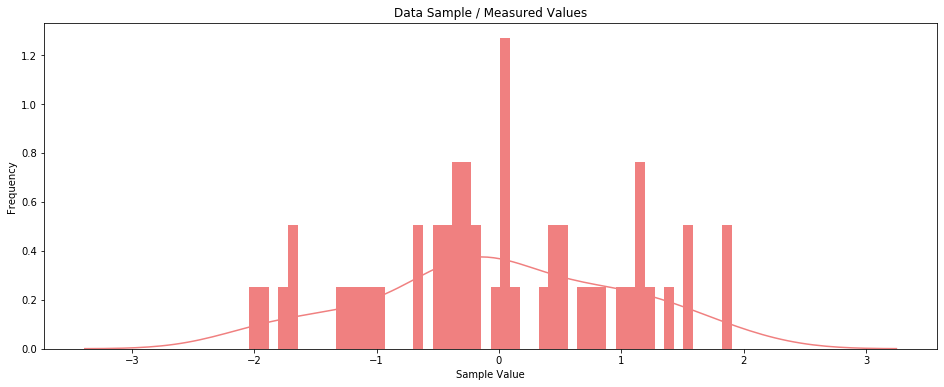

In [13]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(z,
                  bins=50,
                  kde=True,
                  color='lightcoral',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Sample Value', ylabel='Frequency')
title = ax.set(title='Data Sample / Measured Values')

We can see our sample looks roughly(!) normal. 

We have our summary statistics now, but we know this is not representative of the whole population. We are only working with a sample. How sure can we be in our measurements?

## **Q: How can we get an idea of the uncertainty in our measurement of the mean?**

## **Q: Build a data set from our population 'pop'**

In [21]:
means = []

for i in range(0,100):
    new_sample = random.choice(pop,100)
    means.append(new_sample.mean())

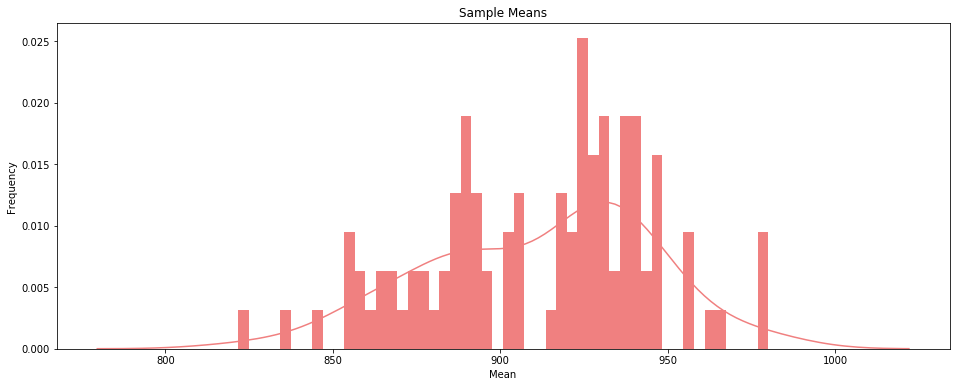

In [22]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(means,
                  bins=50,
                  kde=True,
                  color='lightcoral',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Mean', ylabel='Frequency')
title = ax.set(title='Sample Means')

> This is an example of a **Sampling Distribution** of the Mean

Crucially, this distribution of means is **normally** distributed. Using what we covered in exercise one, we can now provide some uncertainty to our estimate of the mean. If you're not convinced the above is normally distributed, fiddle with the sample size and number of samples taken.

Before we do so:

## Q: How will the mean and standard deviation of our Sampling Distribution compare with that of the Population? Why?

The means should be the same. The standard deviatoin of our samples should be less - we expect to see as much variation between samples means as between the wider population. 

Lets see:

In [23]:
means_mean = np.array(means).mean()
means_std = np.array(means).std()

print(pop_mean, means_mean)
print(pop_std, means_std)

911.6407819816541 911.9250171990951
311.9124180948525 33.070884361046595


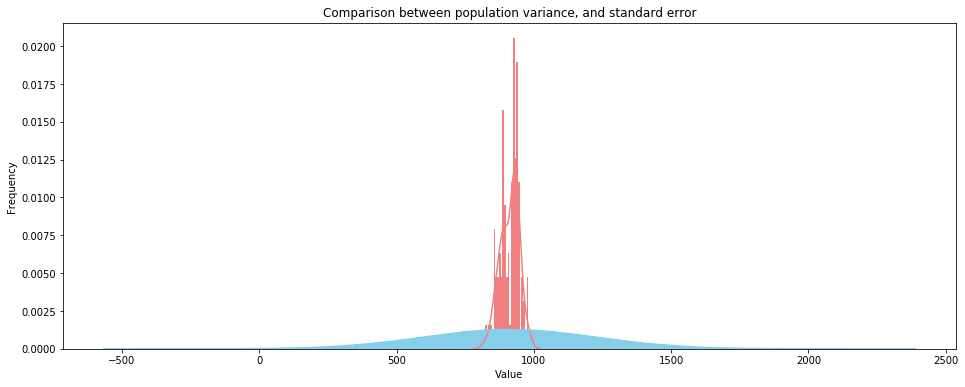

In [24]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(np.array(means),
                  bins=25,
                  kde=True,
                  color='lightcoral',
                  hist_kws={"linewidth": 15,'alpha':1})
ax = sns.distplot(pop,
                  bins=50,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Value', ylabel='Frequency')
title = ax.set(title='Comparison between population variance, and standard error')

## Q: How can we use the standard deviation of our sampling distribution to provide an uncertainty on our mean value?

In [25]:
print(means_mean)
print(means_std)

911.9250171990951
33.070884361046595


In [27]:
print(f'We can be 95%% the means falls within {means_mean} ± {2*means_std}')

We can be 95%% the means falls within 911.9250171990951 ± 66.14176872209319


This means that 68% of the time, our mean will fall within one standard deviation from the population mean. This standard deviation is known as the Standard Error.

> The **Standard Error** is the standard deviation of a sampling distribution of means. It quantifies how precisely we know the true population mean.

> $SE = \frac{\sigma}{\sqrt(n)}$

Using this formula means we do *not* have to repeatedly draw samples but can instead estimate it from a single sample.

## Q: Create a function to calculate the SE for a single sample

In [28]:
def calc_SE(data):
    return data.std()/(math.sqrt(len(data)))

print(calc_SE(sample))

39.4072890713864


Not perfect, but for just using one sample - it came pretty close. 

## Q: Why is our value not in agreement with above? How could we change that?

## Q: If we wanted to be 100% (or near enough) in our estimate of population mean, how many SEs would we use?

In [31]:
print(f'Population mean = {sample.mean()} ± {2* calc_SE(sample)}')

Population mean = 842.7147371862295 ± 78.8145781427728


> Our range covers 99.7% of values. This is our **Confidence interval**.

> *It is the probability that a population parameter will fall between a set of values for a certain proportion of times*

> Two of the most commonly used confidence intervals are 95% and 99%.

c.f. true value:

In [30]:
pop_mean

911.6407819816541

# 3. Hypothesis Testing

Lets now use what we know to create our own hypothesis test. Our question: On average, are London Air BnBs priced differently depending on whether they are North or South of the Thames? 

In [57]:
df = pd.read_csv('air.csv')
df.shape

(76216, 16)

We will look at a subset, otherwise it is too easy! Let's pretend we only have a small sample of the data.

In [58]:
df = df.sample(3000, random_state=145)

In [59]:
north = np.array(df[df['region'] == 'North']['price'])
south = np.array(df[df['region'] == 'South']['price'])

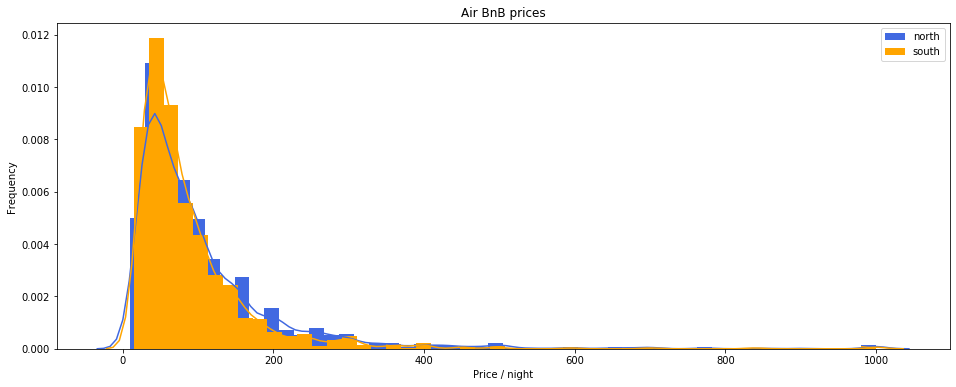

In [60]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(north,
                  kde=True,
                  label='north',
                  color='royalblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax = sns.distplot(south,
                  label='south',
                  kde=True,
                  color='orange',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Price / night', ylabel='Frequency')
title = ax.set(title='Air BnB prices')
ax.legend()
plt.show()

## Q: We can be 95% sure that...

In [61]:
print(f'Price mean for North London = {north.mean()} ± {calc_SE(north)}')
print(f'Price mean for South London = {south.mean()} ± {calc_SE(south)}')

Price mean for North London = 106.12851196670135 ± 2.5033049550616413
Price mean for South London = 87.96938775510205 ± 2.5917085728874634


We now have the necessary information from both samples to create a distribution of means for both. 

In [62]:
print(north.mean(),calc_SE(north))
print(south.mean(),calc_SE(south))

106.12851196670135 2.5033049550616413
87.96938775510205 2.5917085728874634


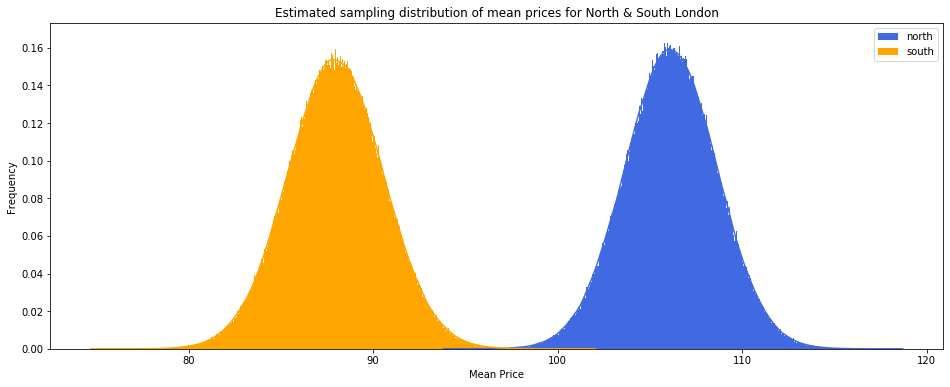

In [63]:
north_means = norm.rvs(size=1000000,
                       loc=north.mean(),
                       scale=calc_SE(north))
south_means = norm.rvs(size=1000000,
                       loc=south.mean(),
                       scale=calc_SE(south))

plt.figure(figsize=(16, 6))
ax = sns.distplot(north_means,
                  bins=1000,
                  label='north',
                  kde=True,
                  color='royalblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax = sns.distplot(south_means,
                  bins=1000,
                  label='south',
                  kde=True,
                  color='orange',
                  hist_kws={"linewidth": 15,'alpha':1})
labels = ax.set(xlabel='Mean Price', ylabel='Frequency')
title = ax.set(title='Estimated sampling distribution of mean prices for North & South London')
leg = ax.legend()

Note the change in overlap! Our two sets of data, which initially looked the same, now show major differences. While many properties in South London may be more expensive than in North London, very rarely will a *sample* of properties in the South have a higher mean than in the North.

In [64]:
# note this value for later
south_means.mean() - north_means.mean()

-18.163287429616474

# Try to guess what we will now do to know if this difference in sample means is statistically significant

We will create *another* distribution! A distribution of differences. We are asking: how often will a North sample have a mean than a South sample, and vice versa.

In [65]:
mean_differences = north_means - south_means

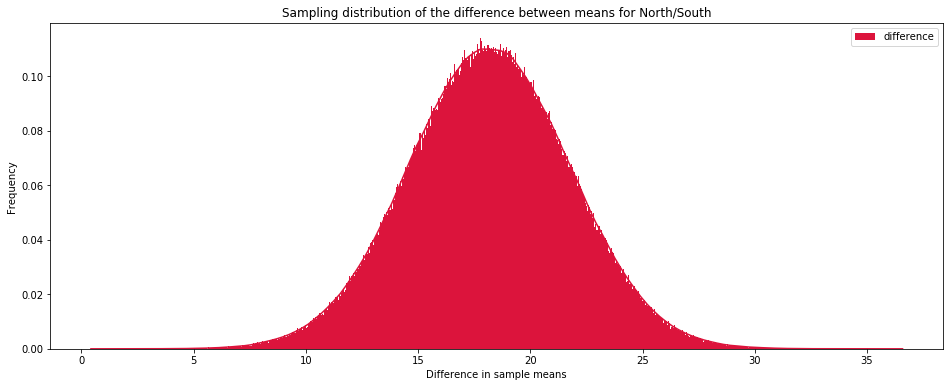

In [66]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(mean_differences,
                  bins=1000,
                  label='difference',
                  kde=True,
                  color='crimson',
                  hist_kws={"linewidth": 15,'alpha':1})

labels = ax.set(xlabel='Difference in sample means', ylabel='Frequency')
title = ax.set(title='Sampling distribution of the difference between means for North/South')
leg = ax.legend()

> As with the distribution of means, the standard deviation here is known as the standard error. 

>In this case, as the *Standard Error of the differences between means* (SE-Diff)

> We can estimate this using: SE-Diff = $\sqrt{\sigma_{a}^{2}+\sigma_{b}^{2}}.$

## Q: Create a function to calculate SE-Diff

In [68]:
def calc_SE_Diff(sig_a,sig_b):
    
    
    return math.sqrt((sig_a**2)+(sig_b**2))

As before, all the usual proportions that relate to normal curves apply. E.g., 68% of values can be expected to fall within  $\pm\sigma$ of the mean value.

Now we are armed with some tools to make our final judgement. But first, everyone's favorite bit. Let's be cautious and following convention, assume our samples actually $do$ come from the same sample. In other words:

> Null hypothesis: There is no real difference between rental prices in North/South London. They belong to the same population. 

> Alternate hypothesis: This *is* a difference between rental prices in North/South London.

As always, we assume the Null is correct. Let's then look at what we would expect the above distribution to look like, should that be case. If the variation we observe is too much to realistically accept - we can accept the alternate hypothesis.

## Q: What would we expect to see in this distribution of differences for two samples drawn from the *same* population?

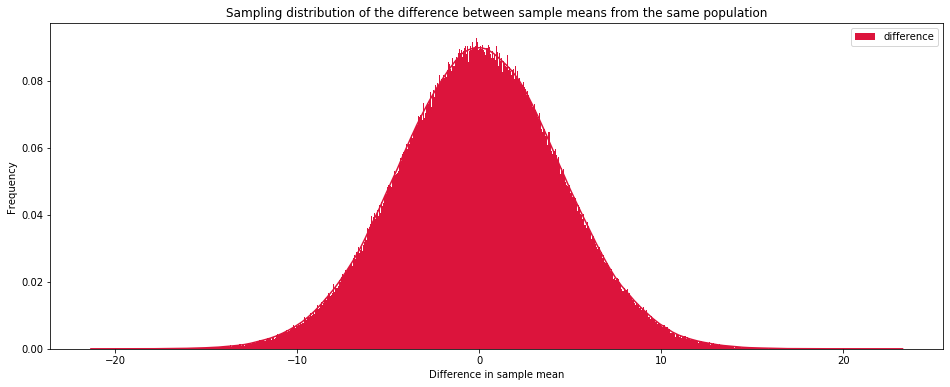

In [69]:
# Create two sampling distributions from the same population
n = 10000
sample1 = random.choice(pop,n)

sample1_means = norm.rvs(size=1000000,
                       loc=sample1.mean(),
                       scale=calc_SE(sample1))
sample2_means = norm.rvs(size=1000000,
                       loc=sample1.mean(),
                       scale=calc_SE(sample1))

# Plot the differences
plt.figure(figsize=(16, 6))
ax = sns.distplot(sample1_means-sample2_means,
                  bins=1000,
                  label='difference',
                  kde=True,
                  color='crimson',
                  hist_kws={"linewidth": 15,'alpha':1})

labels = ax.set(xlabel='Difference in sample mean', ylabel='Frequency')
title = ax.set(title='Sampling distribution of the difference between sample means from the same population')
leg = ax.legend()

We would expect our distribution to be centred on 0! However, even samples drawn from the same population will create some variation

In [70]:
print(f'Even if our samples were from the same population...')
print(f'\n Their means would differ by ±{calc_SE_Diff(calc_SE(sample1),calc_SE(sample1))} 68% percent of the time.')
print(f'\n Their means would differ by ±{2*calc_SE_Diff(calc_SE(sample1),calc_SE(sample1))} 95% percent of the time.')
print(f'\n Their means would differ by ±{3*calc_SE_Diff(calc_SE(sample1),calc_SE(sample1))} 99% percent of the time.')

Even if our samples were from the same population...

 Their means would differ by ±4.434204549323152 68% percent of the time.

 Their means would differ by ±8.868409098646303 95% percent of the time.

 Their means would differ by ±13.302613647969455 99% percent of the time.


Lets now compare or Air BnB data with what we would expect to see if there was no difference. I.e. mean = 0 

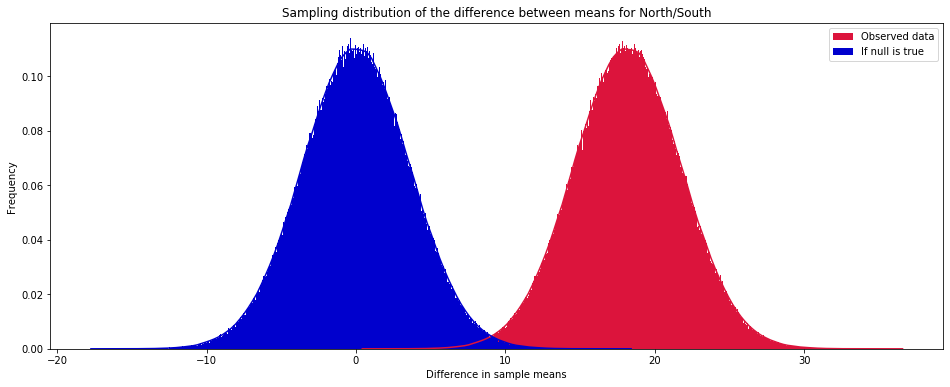

In [71]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(mean_differences,
                  bins=1000,
                  label='Observed data',
                  kde=True,
                  color='crimson',
                  hist_kws={"linewidth": 15,'alpha':1})
null_dist = mean_differences-mean_differences.mean()
ax = sns.distplot(null_dist,
                  bins=1000,
                  label='If null is true',
                  kde=True,
                  color='mediumblue',
                  hist_kws={"linewidth": 15,'alpha':1})

labels = ax.set(xlabel='Difference in sample means', ylabel='Frequency')
title = ax.set(title='Sampling distribution of the difference between means for North/South')
leg = ax.legend()

In [72]:
print(f'Even if our samples were from the same population...')
print(f'\n Their means would differ by ±{calc_SE_Diff(calc_SE(north),calc_SE(south))} 68% percent of the time.')
print(f'\n Their means would differ by ±{2*calc_SE_Diff(calc_SE(north),calc_SE(south))} 95% percent of the time. (p=0.05)')
print(f'\n Their means would differ by ±{3*calc_SE_Diff(calc_SE(north),calc_SE(south))} 99% percent of the time. (p=0.1)')

Even if our samples were from the same population...

 Their means would differ by ±3.60326088769805 68% percent of the time.

 Their means would differ by ±7.2065217753961 95% percent of the time. (p=0.05)

 Their means would differ by ±10.80978266309415 99% percent of the time. (p=0.1)


In [73]:
print(f'Here, our most common difference in sample means is {mean_differences.mean()}')

Here, our most common difference in sample means is 18.1632874296165


In [80]:
z = (mean_differences.mean() - null_dist.mean())/null_dist.std()
z

5.045181079119372

As in exercise 1, we can calculate the probability of achieving a result like this...

<img src="media/normal.png" alt="Uniform" style="width: 400px;"/>

In [81]:
p = (1- norm.cdf(z)) * 2
p

4.5309205609633807e-07

We have a 2% chance of observing these differences due to chance. Depending on whether we working at the 95 (p=0.05) or 99 (p=0.01) signficance level, we could either reject or accept the alternate hypothesis.

There is a 2% chance this difference would be observed by chance, should these two samples have been from the same population.

In [83]:
from scipy.stats import ttest_ind
ttest_ind(south, north)

Ttest_indResult(statistic=-4.696478567539971, pvalue=2.7658442793122655e-06)

Caveats - the dispersion for North/South is are not too similiar. These should really be the same for the above to be used.

# Stretch Challenge

As above, provide a list of threshold mean differences for p=32, p=0.05 and p=0.01 for the following hypotheses:

> Null hypothesis: There is no real difference between rental prices in North/South London. They belong to the same population. 

> Alternate hypothesis: Rental prices in North London are higher on average then in South London.

This more specific alternate hypothesis has turned this into a *one tail* statistical test.